In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
import math
from random import randint

Estimating the equation for Bernoulli Density

In [148]:
def flip_coins(n):
    return sum([randint(0,1) for x in range(n)])
def calculate_bernoulli_density(p,x0,x1,n):
    density = 0
    for x_prime in range(x0, x1+1):
        fac = math.factorial(n)/(math.factorial(x_prime)*math.factorial(n-x_prime))
        density_= fac * p**x_prime*(1-p)**(n-x_prime)
        density += density_
    return density
calculate_bernoulli_density(.5,4,6,10)

0.65625

In [174]:
experiment_count_slide = widgets.IntSlider(
         description='# exp',
         value=100,
         min=50,
         max=1000)
number_flips_slide = widgets.IntSlider(
         description='# of flips',
         value=10,
         min=10,
         max=250)
range_slide = widgets.IntRangeSlider(
    value=[5, 7],
    min=1,
    max=250,
    step=1,
    description='Test:',
    continuous_update=False,
    readout=True,
    readout_format='d',
)

use_slider_inputs = widgets.Checkbox(
    value=False,
    description='Use values set by these sliders',
    disabled=False,
)

box = widgets.VBox([experiment_count_slide, number_flips_slide, range_slide, use_slider_inputs])
box

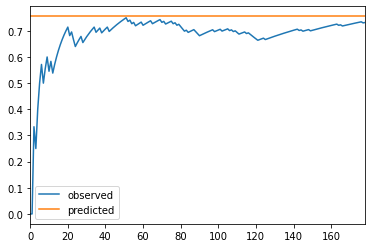

In [182]:
experiment_count = 1000
number_flips = 100
expected_range = [40,60]

if use_slider_inputs.value:
    experiment_count = experiment_count_slide.value
    number_flips=number_flips_slide.value
    expected_range = list(range_slide.value)
    
    
results = []
bernoulli = pd.DataFrame(columns = ['observed', 'predicted'])

for n in range(experiment_count):
    flips = flip_coins(number_flips)
    result = int(expected_range[0]<=flips<=expected_range[1])
    results.append(result)
    observed = sum(results)/(n+1)
    bernoulli = bernoulli.append({'observed':observed}, ignore_index = True)

bernoulli['predicted'] = calculate_bernoulli_density(.5,expected_range[0],expected_range[1],number_flips)

ax = plt.gca()
bernoulli.plot(kind='line', y='observed', ax=ax)
bernoulli.plot(kind='line', y='predicted', ax=ax)